# Telco Customer Churn
## Supervised Machine Learning Classification Project

In this project the churn behavior of telco customers is of interest. Different machine learning classification algorithms will be to identify the best suited one. As a result, data driven intelligente business desicions are expected to be deduced, to improve product services, return values and customer satisfaction.

Original dataset: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Telco_Cus_Churn.csv')

In [3]:
# make copy of original data
data = df.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis
First, the dataset will be explored and checked for any missing data. Potential missing data will have to be dealed with. Either way, getting acquinted with the data by visualzing them and identifying classifying features is ov the essence here.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Important Note: There are no missing data!

In [7]:
df['SeniorCitizen'].unique()

array([0, 1])

In [8]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

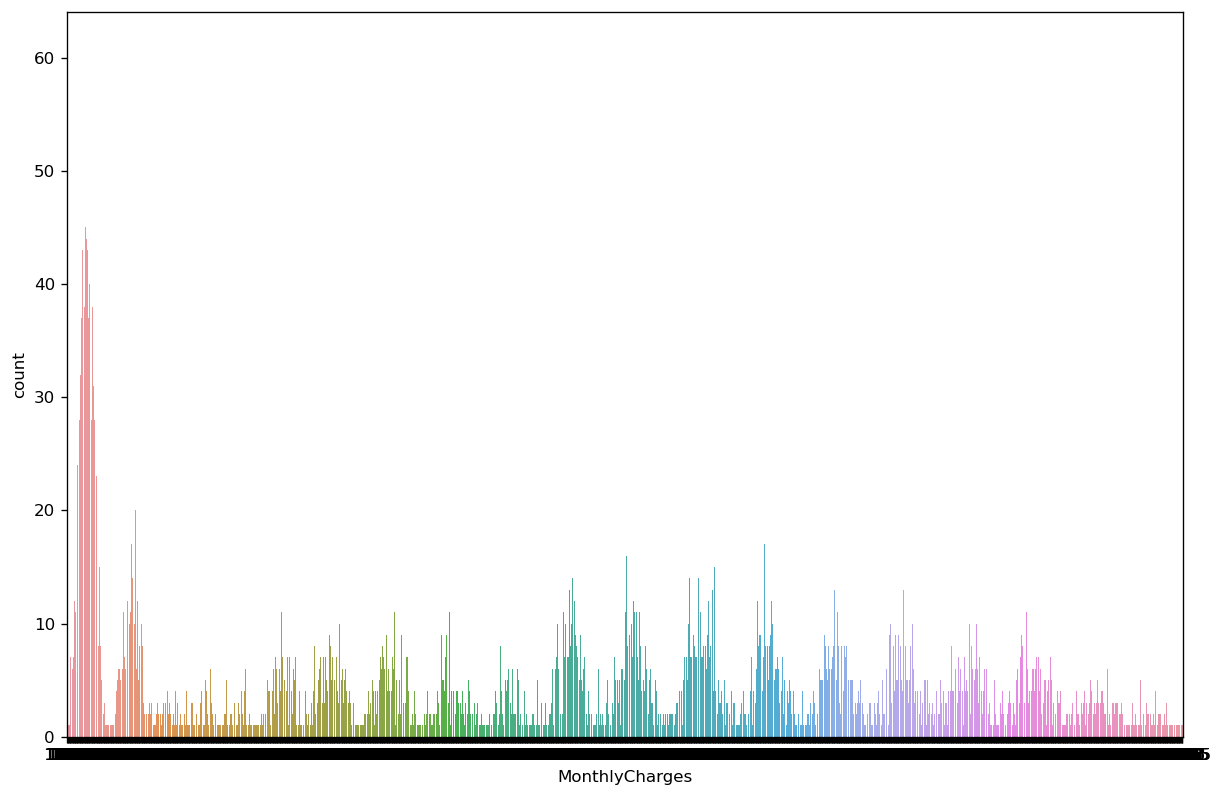

In [10]:
plt.figure(figsize=(12,8),dpi=120)
sns.countplot(data=df, x='MonthlyCharges');

The Dtype of the feature 'TotalCharge' is an object and not a float, indicating that there is something wrong with those data. First, let's find the reason for this object dtype, then a proper fix for it.

In [11]:
df['TotalCharges'].str.isnumeric().unique()

array([False,  True])

In [12]:
df[df['TotalCharges'].str.isnumeric()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
46,5948-UJZLF,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.25,97,No
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962,No
72,1891-QRQSA,Male,1,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.60,7099,No
87,1862-QRWPE,Female,0,Yes,Yes,48,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1057,No
93,6067-NGCEU,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),111.05,7107,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,7693-LCKZL,Male,0,Yes,Yes,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,385,Yes
6942,3454-JFUBC,Male,1,No,No,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.00,1396,No
6959,1024-KPRBB,Female,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Mailed check,89.10,3342,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No


In [13]:
df['TotalCharges'].str.isalpha().unique()

array([False])

In [14]:
df['TotalCharges'].str.isalnum().unique()

array([False,  True])

In [15]:
type(df['TotalCharges'].iloc[1])

str

In [16]:
n = len(df)

index_list = []

for i in range(0,n):
    try:
        df['TotalCharges'].iloc[i] = float(df['TotalCharges'].iloc[i])
    except:
        err_index = i
        #print(f'TotalCharges not confertible into float at index {err_index}')
        index_list.append(err_index)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
len(index_list)

11

In [18]:
df.iloc[index_list]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 examples with no 'TotalCharge', despite having a 'MonthlyCharge' value. The tenure for all of these examples is 0. Hence, it is not possible to calculate the total charge manually. There is a chance that these are all new customers and therefor with little information on the prediction value 'Churn', since it is 'No' for all of them. For this reason, these 11 examples do not contribute to the predictive value of this dataset and will be dropped.

In [19]:
df = df.drop(index_list)

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<Figure size 1440x960 with 0 Axes>

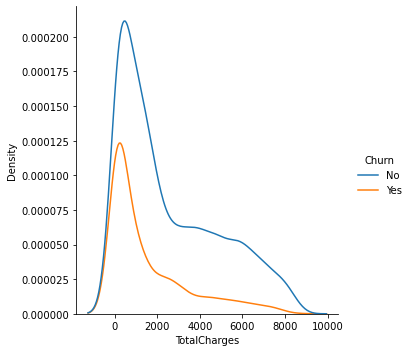

In [22]:
plt.figure(figsize=(12,8),dpi=120)
sns.displot(data=df, x='TotalCharges', kind='kde', hue='Churn');

<Figure size 1440x960 with 0 Axes>

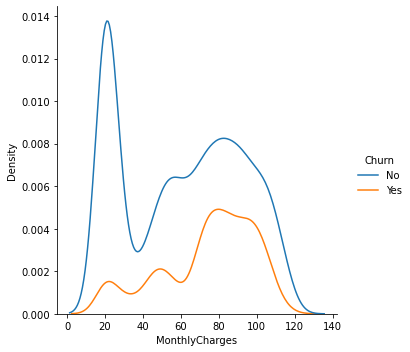

In [23]:
plt.figure(figsize=(12,8),dpi=120)
sns.displot(data=df, x='MonthlyCharges', kind='kde', hue='Churn');

Customers having a higher monthly charge are more likely to quit the contract than with lower charges. In addition, having very low monthly charges decreases the likelyhood that the customer quits drastically.

In [24]:
df['tenure'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

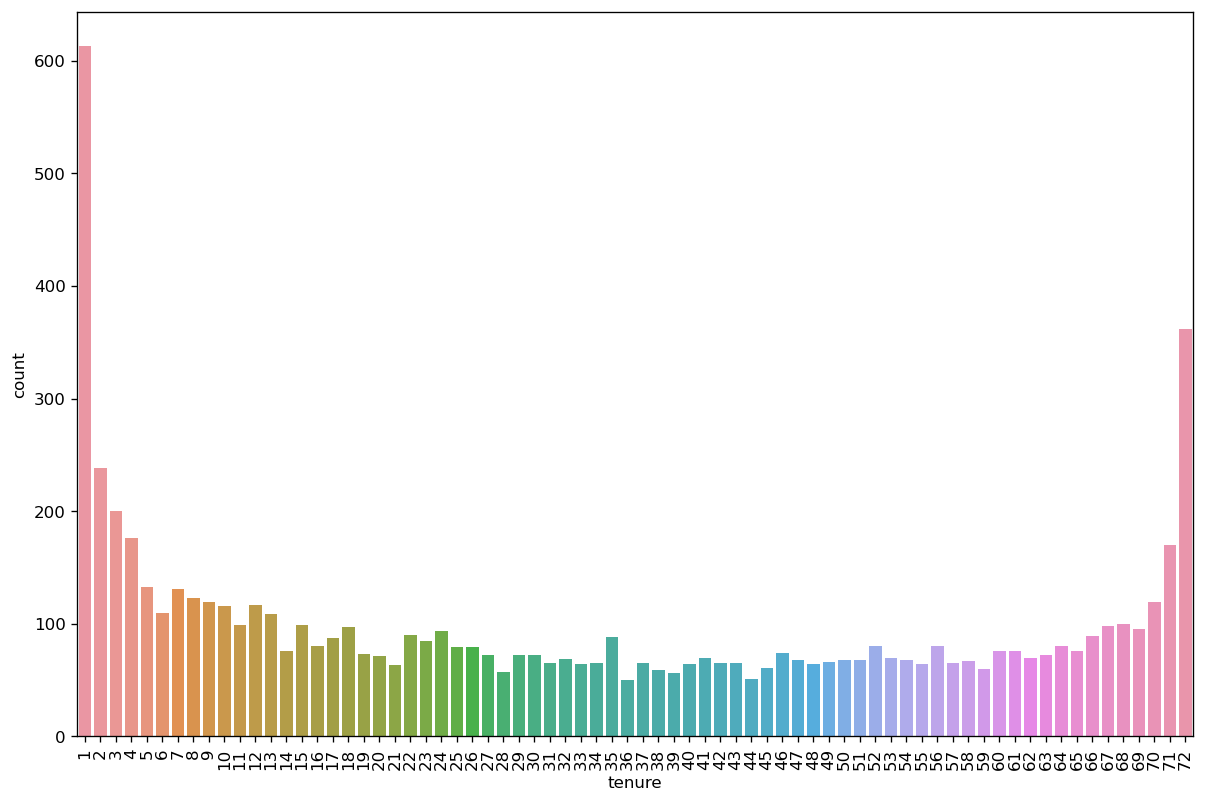

In [25]:
plt.figure(figsize=(12,8),dpi=120)
sns.countplot(data=df, x='tenure')
plt.xticks(rotation=90);

There are three main customer groups: 1) A large groupe of customers with a very short tenure of just a couple of month 2) A large group of customers with a tenure of 72 month (maximum or accumulation of 72+) and 3) a more or less uniform distribution of customers with tenures between the two extreme groups.


Since the question at hand is of a classification nature, the label balance is of importance.

<AxesSubplot:xlabel='Churn', ylabel='count'>

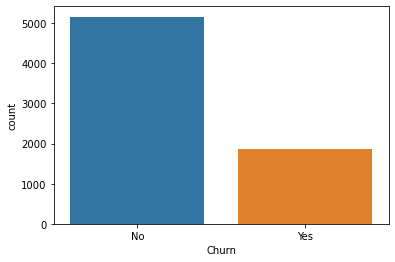

In [26]:
sns.countplot(data=df, x='Churn')

From this plot it is clear that the Churn outcome is not balanced, but sees a strong emphasis to 'No'. However, it is  not as extremly imbalanced to call them outliers.

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Exploring the correlations of the features with the prediction target 'Churn'. Therefor, numeric dummy variables are neccessary. The non-informative 'customerID' column is dropped. Redundand columns (drop_first) are kept in the DataFrame for a more intuitive visualisation possibility.

In [28]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','MonthlyCharges', 'TotalCharges','Churn']]).corr()

In [29]:
churn_corr = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
#churn_corr

Visualizing the sorted correlation features with regard to the churn.

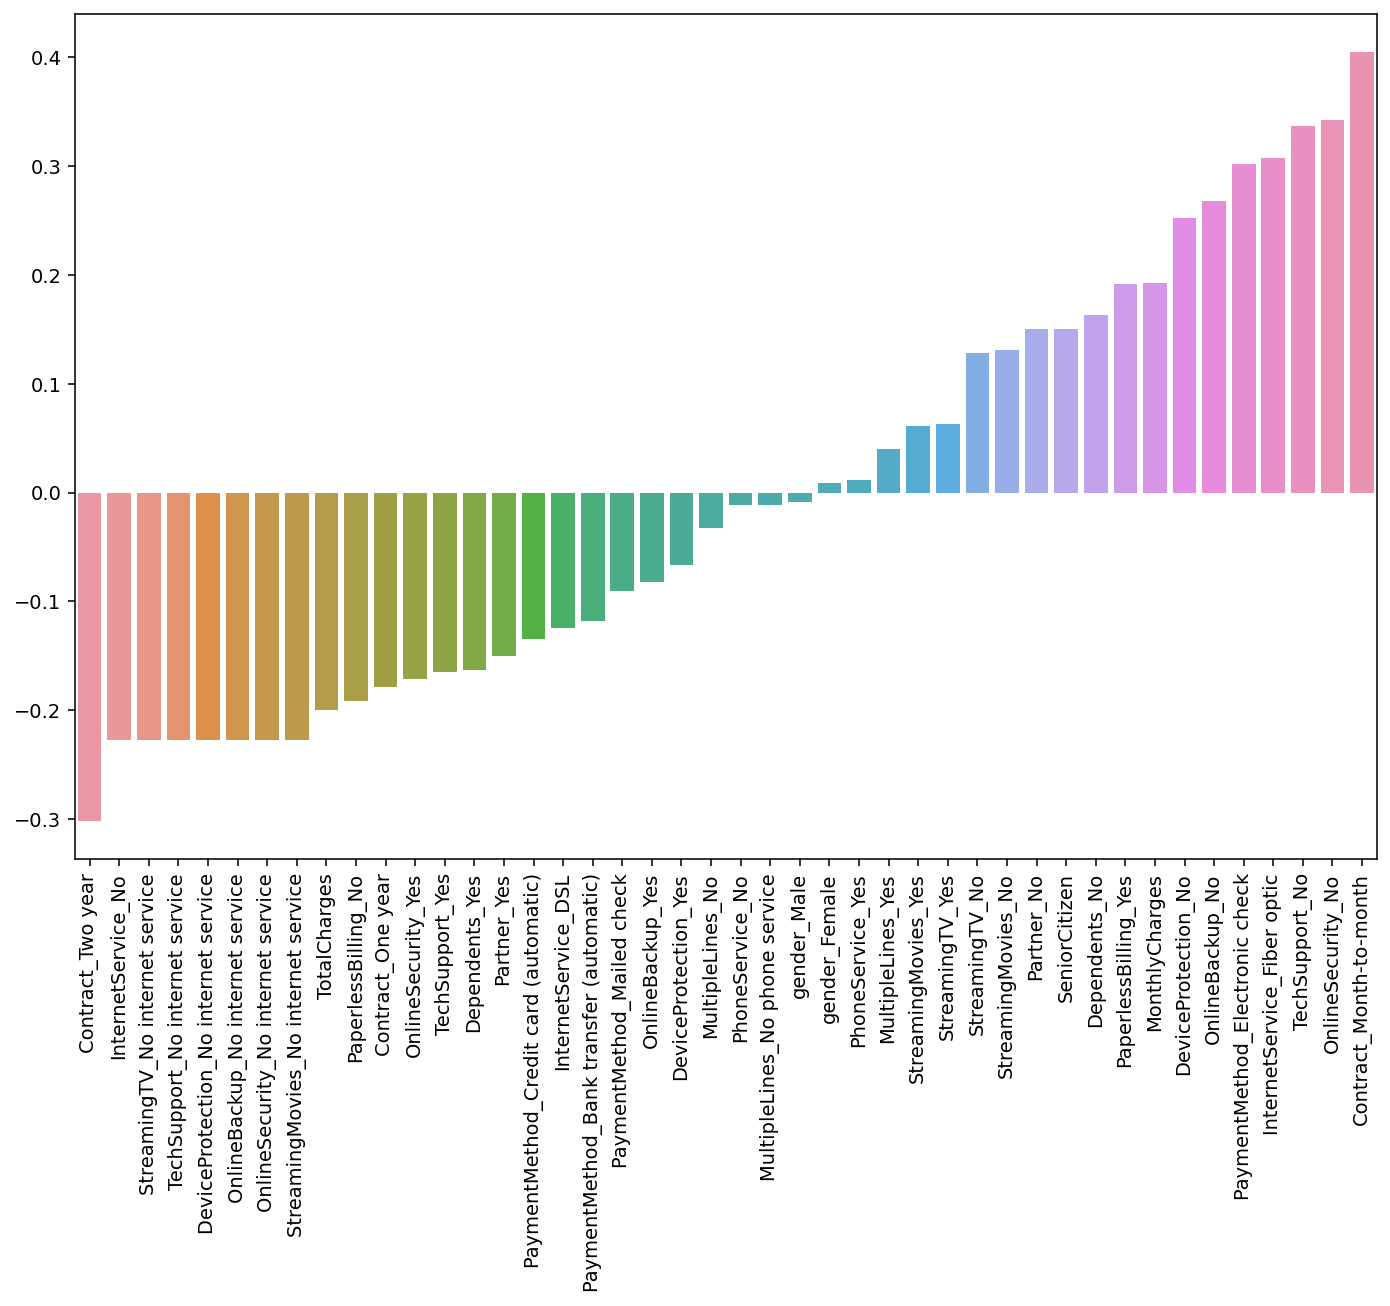

In [31]:
plt.figure(figsize=(12,8),dpi=140)
sns.barplot(x=churn_corr.index, y=churn_corr.values)
plt.xticks(rotation=90);

So far we could see that the contract type and the monthly charges could be of significance whether or not a customer churns. Let's investigate this further.

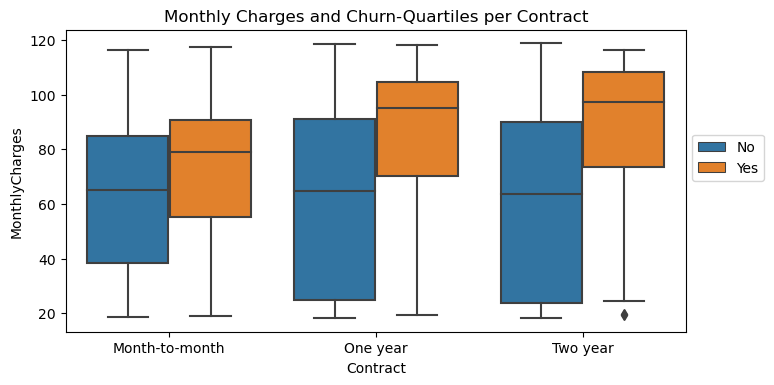

In [30]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=df, x='Contract',y='MonthlyCharges',hue='Churn')
plt.legend(loc=(1.01,0.5))
plt.title('Monthly Charges and Churn-Quartiles per Contract');

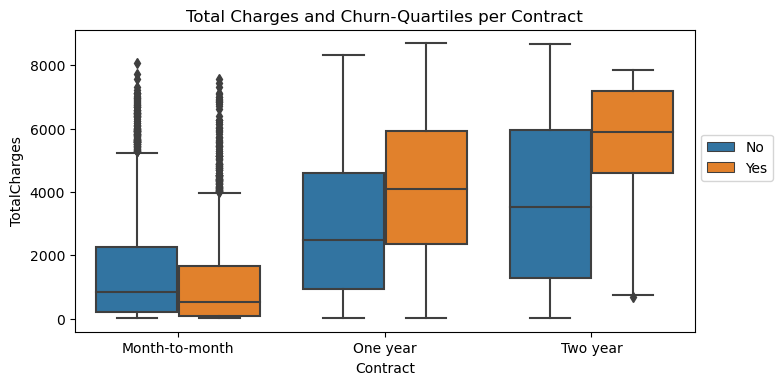

In [32]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=df, x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.01,0.5))
plt.title('Total Charges and Churn-Quartiles per Contract');

There is a drastic difference between customers who pay more monthly/in total with regards to the churn rate. While it is not dominant in short-term contracts (as expected by its nature), this becomes more pronounced the longer the contract is. Hence, it may be worth investing into long-term contract customers who are charged more on average by some discounts or bonus programs etc.

Let's also disentangle the contract type and tenure by means of churn:

<Figure size 960x640 with 0 Axes>

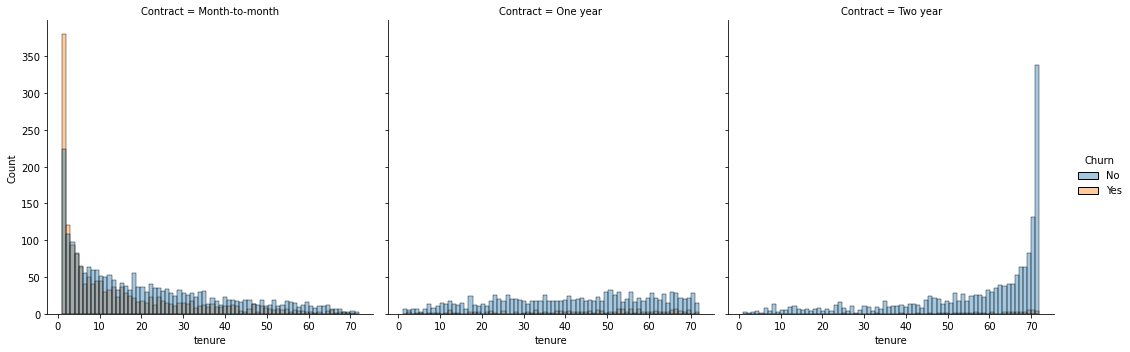

In [33]:
plt.figure(dpi=160)
sns.displot(data=df, x='tenure', col='Contract', hue='Churn', bins=72, alpha=0.4);

Customers with a one or two year contract are very unlikely to churn in contrast to month-to-month term contracts. Hence, as a company, there should be a focus on short-term customers and maybe a good transfer option such as into a long-term contract and/or with changing the address in order to keep recently acquired customers for a longer periode.

To visualize this further, the churn percentage rate with respect to the contract type will be analyzed.

In [34]:
churn_cont_y = df.groupby(['Churn','Contract']).count().T['Yes'];
churn_cont_n = df.groupby(['Churn','Contract']).count().T['No'];

churn_cont_rate = churn_cont_y / (churn_cont_y + churn_cont_n) * 100

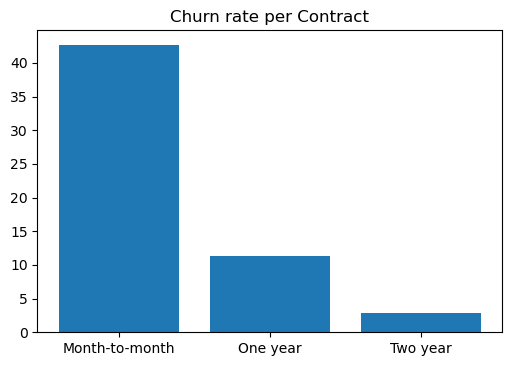

In [36]:
fig, ax = plt.subplots(dpi=100)

ax.bar(x=churn_cont_rate.columns, height=churn_cont_rate.iloc[0])
ax.set_title('Churn rate per Contract');

This plot shows how significant the group of month-to-month contract type customers is with respect to the overall churn rate, while long term customers churn as little as 3%.

A similar analysis will be performed for the "Tenure" feature.

In [37]:
churn_ten_y = df.groupby(['Churn','tenure']).count().T['Yes'];
churn_ten_n = df.groupby(['Churn','tenure']).count().T['No'];

churn_ten_rate = churn_ten_y / (churn_ten_y + churn_ten_n) * 100

Text(0.5, 0, 'Tenure (month)')

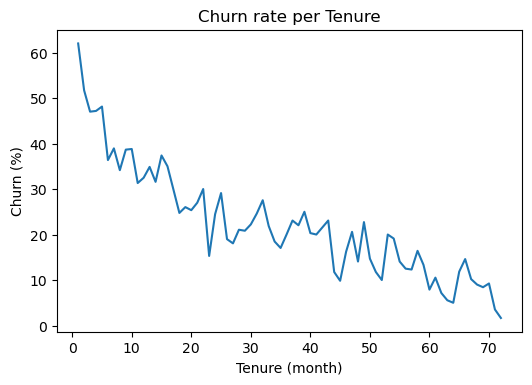

In [38]:
plt.figure(dpi=100)
plt.plot(churn_ten_rate.columns, churn_ten_rate.iloc[0])
plt.title('Churn rate per Tenure')
plt.ylabel('Churn (%)')
plt.xlabel('Tenure (month)')

## Classification and Predictions

Separating the dataset into X features and Y labels, whereas features which do not add any information are dropped. The rest of the categorical (object type) features is converted into dummy variables - this time redundant columns can be dropped (drop_first = True).

In [39]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [40]:
X = df.drop(['customerID', 'Churn'], axis=1)
X = pd.get_dummies(data=X, drop_first=True)

In [41]:
y = df['Churn']

Importing the neccesssary libraries to process the data for the ML models. Since several classifiers will be tested, the data will also be scaled. Due to the fact that cross-validations will be performed, a final hold-out test set of only 10% will be splitt off.

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
from sklearn.pipeline import make_pipeline, Pipeline

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [46]:
scaler = StandardScaler()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Setting up a GridSearchCV and Evaluation function

In [50]:
def run_model(model, operations, param_grid, X_train, y_train): #(model, operations, param_grid, X_train, X_test, y_train, y_test):
    '''
    General Pipeline and GridSearchCV model.
    Inputs:
    model - Machine Learining model instance
    operations - Pipeline operations, list of tuples
    param_grid - Dictionary of parameters over which the GridSearch will be performed
    X_train - Training feature dataset, pandas DataFrame
    y_train - Training target labels, pandas Series 
    '''
    
    # pipe
    pipe = Pipeline(operations)
    
    # grid with accuracy scoring metric, since no drastic off-balanced dataset is at hand
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')#'f1')
    
    # fit
    grid.fit(X_train, y_train)
    
    # grid.best_score_, grid.best_params_
    print("Best parameter (CV accuracy-score=%0.5f):" % grid.best_score_)
    print(grid.best_params_)
    

In [51]:
def best_model_metrics(model, X_train, X_test, y_train, y_test):
    '''
    Evaluate the best model and visualize performance via a classification report and confusion matrix
    Inputs:
    model - Machine Learining model instance
    X_train - Training feature dataset, pandas DataFrame
    y_train - Training target labels, pandas Series
    X_test - final hold-out test feature dataset, pandas DataFrame
    y_test - final hold-out test target labels, pandas Series 
    '''
    
    # scale
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    # model fit
    model.fit(scaled_X_train, y_train)
    
    # predict
    preds = model.predict(scaled_X_test)
    
    # metrics
    print(classification_report(y_test, preds))
    
    # plots
    plot_confusion_matrix(model, scaled_X_test, y_test)
    

### Forest based Models

In [52]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

#### RandomForestClassifier

In [54]:
# initiate classifier
# make sure random_state is set in order to allow comparability
rfc = RandomForestClassifier(random_state=101)

In [55]:
# model.get_params().keys()
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [56]:
# operations
operations = [('scaler', scaler), ('rfc', rfc)]

In [57]:
#help(RandomForestClassifier)

In [58]:
# param_grid
param_grid = {'rfc__n_estimators':[10,25,50,75,100,125,200], 
            'rfc__max_depth':[4,5,6,7,8,9,None],
             'rfc__criterion':['gini','entropy'],
             'rfc__max_features':['sqrt','log2'],
             'rfc__bootstrap':[True,False]
             }

In [110]:
# This cell is commented out in order to avoid running the extensive GridSearch by accident. 
# Results are printed below this cell

#run_model(rfc, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80721):
{'rfc__bootstrap': True, 'rfc__criterion': 'entropy', 'rfc__max_depth': 9, 'rfc__max_features': 'log2', 'rfc__n_estimators': 75}


Best parameter (CV f1-score=0.80689):
{'rfc__bootstrap': True, 'rfc__criterion': 'entropy', 'rfc__max_depth': 8, 'rfc__max_features': 'log2', 'rfc__n_estimators': 125

Best parameter (CV f1-score=nan):
{'rfc__bootstrap': True, 'rfc__criterion': 'gini', 'rfc__max_depth': 4, 'rfc__max_features': 'sqrt', 'rfc__n_estimators': 10}

Refinement of the hyperparamters:

In [59]:
# param_grid
param_grid = {'rfc__n_estimators':[110,125,130,150,175], 
            'rfc__max_depth':[7,8,9,10],
             'rfc__criterion':['gini','entropy'],
             'rfc__max_features':['sqrt','log2'],
             'rfc__bootstrap':[True]
             }

In [60]:
# honing in the best params from the grid search
run_model(rfc, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80531):
{'rfc__bootstrap': True, 'rfc__criterion': 'gini', 'rfc__max_depth': 8, 'rfc__max_features': 'log2', 'rfc__n_estimators': 130}


Best parameter (CV f1-score=0.80563):
{'rfc__bootstrap': True, 'rfc__criterion': 'gini', 'rfc__max_depth': 8, 'rfc__max_features': 'log2', 'rfc__n_estimators': 130}

The refined grid search did not result in a better accuracy score. Hence, the model parameters from the initial search will be used for the final model and metrics evaluation.

In [61]:
final_rfc = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=8, max_features='log2',
                                  n_estimators=125, random_state=101)

              precision    recall  f1-score   support

          No       0.81      0.92      0.86       511
         Yes       0.65      0.42      0.51       193

    accuracy                           0.78       704
   macro avg       0.73      0.67      0.68       704
weighted avg       0.76      0.78      0.76       704



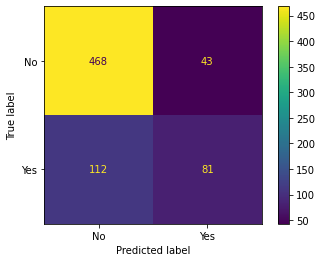

In [62]:
best_model_metrics(final_rfc, X_train, X_test, y_train, y_test)

#### Gradient Boosted Tree Classifier

In [63]:
#help(GradientBoostingClassifier)

In [64]:
gb_model = GradientBoostingClassifier(random_state=101)

In [65]:
gb_model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [66]:
# operations
operations = [('scaler', scaler), ('gb_model', gb_model)]

In [67]:
param_grid = {'gb_model__n_estimators':[1,5,10,20,40,100],
              'gb_model__max_depth':[2,3,4,5,6],
              'gb_model__learning_rate':[0.01,0.1,0.2],
             }

In [138]:
# This cell is commented out in order to avoid running the extensive GridSearch by accident. 
# Results are printed below this cell

#run_model(gb_model, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80642):
{'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 4, 'gb_model__n_estimators': 40}


Best parameter (CV accuracy-score=0.80642):
{'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 4, 'gb_model__n_estimators': 40}

In [68]:
# honed in parameters
param_grid = {'gb_model__n_estimators':[30,35,40,45,50,60,70],
              'gb_model__max_depth':[3,4,5],
              'gb_model__learning_rate':[0.1],
             }

In [69]:
# honed in model
run_model(gb_model, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80642):
{'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 4, 'gb_model__n_estimators': 40}


Best parameter (CV accuracy-score=0.80642):
{'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 4, 'gb_model__n_estimators': 40}

In [70]:
final_gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=40, random_state=101)

              precision    recall  f1-score   support

          No       0.83      0.91      0.87       511
         Yes       0.67      0.50      0.58       193

    accuracy                           0.80       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.79      0.80      0.79       704



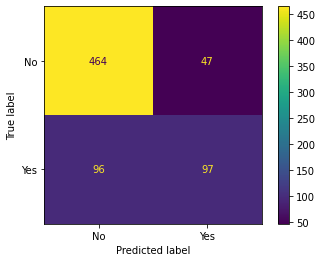

In [71]:
best_model_metrics(final_gb_model, X_train, X_test, y_train, y_test)

#### Ada Boost Tree Classifier

In [72]:
#help(AdaBoostClassifier)

In [73]:
ada_model = AdaBoostClassifier(random_state=101)

In [74]:
ada_model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [75]:
# operations
operations = [('scaler', scaler), ('ada_model', ada_model)]

In [76]:
param_grid = {'ada_model__n_estimators':[1,2,5,10,20,30,40,50,60,75,100],
             'ada_model__learning_rate':[0.01,0.1,0.2]
             }

In [152]:
# This cell is commented out in order to avoid running the extensive GridSearch by accident. 
# Results are printed below this cell

#run_model(ada_model, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80436):
{'ada_model__learning_rate': 0.2, 'ada_model__n_estimators': 100}


Best parameter (CV accuracy-score=0.80436):
{'ada_model__learning_rate': 0.2, 'ada_model__n_estimators': 100}

In [77]:
# honed in parameters
param_grid = {'ada_model__n_estimators':[90,100,125,140,150,160,170,200],
             'ada_model__learning_rate':[0.1,0.2,0.3,0.5]
             }

In [78]:
# honed in model
run_model(ada_model, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80689):
{'ada_model__learning_rate': 0.3, 'ada_model__n_estimators': 150}


Best parameter (CV accuracy-score=0.80689):
{'ada_model__learning_rate': 0.3, 'ada_model__n_estimators': 150}

In [79]:
final_ada_model = AdaBoostClassifier(learning_rate=0.3, n_estimators=150)

              precision    recall  f1-score   support

          No       0.82      0.91      0.86       511
         Yes       0.65      0.47      0.54       193

    accuracy                           0.79       704
   macro avg       0.74      0.69      0.70       704
weighted avg       0.77      0.79      0.77       704



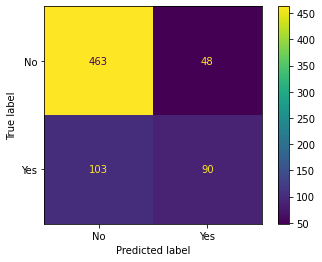

In [80]:
best_model_metrics(final_ada_model, X_train, X_test, y_train, y_test)

### KNeighbors Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#help(KNeighborsClassifier)

In [83]:
knn = KNeighborsClassifier()

In [84]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [85]:
# operations
operations = [('scaler', scaler), ('knn', knn)]

In [86]:
param_grid = {'knn__n_neighbors':list(range(1,21)),
             'knn__algorithm':['auto','ball_tree','kd_tree']
             }

In [87]:
# This cell is commented out in order to avoid running the extensive GridSearch by accident. 
# Results are printed below this cell

run_model(knn, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.78824):
{'knn__algorithm': 'auto', 'knn__n_neighbors': 16}


Best parameter (CV accuracy-score=0.78824):
{'knn__algorithm': 'auto', 'knn__n_neighbors': 16}

In [88]:
final_knn = KNeighborsClassifier(n_neighbors=16)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86       511
         Yes       0.64      0.47      0.54       193

    accuracy                           0.78       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.77      0.78      0.77       704



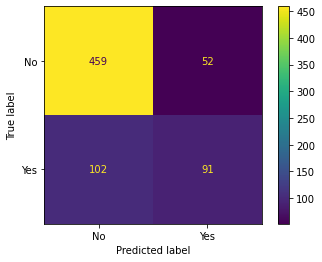

In [89]:
best_model_metrics(final_knn, X_train, X_test, y_train, y_test)

### Support Vector Classifier

In [90]:
from sklearn.svm import SVC

In [91]:
#help(SVC)

In [92]:
svc = SVC(random_state=101)

In [93]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [94]:
# operations
operations = [('scaler', scaler), ('svc', svc)]

In [95]:
param_grid = {'svc__C':[0.001,0.01,0.1,0.5,1],
             'svc__gamma':['scale','auto']}

In [184]:
# This cell is commented out in order to avoid running the extensive GridSearch by accident. 
# Results are printed below this cell

#run_model(svc, operations, param_grid, X_train, X_test, y_train, y_test)

Best parameter (CV accuracy-score=0.80025):
{'svc__C': 0.5, 'svc__gamma': 'scale'}


Best parameter (CV accuracy-score=0.80025):
{'svc__C': 0.5, 'svc__gamma': 'scale'}

In [96]:
# honed in parameters
param_grid = {'svc__C':[0.3,0.4,0.5,0.6,0.7,0.9],
             'svc__gamma':['scale','auto']}

In [97]:
# honed in model
run_model(svc, operations, param_grid, X_train, y_train)

Best parameter (CV accuracy-score=0.80041):
{'svc__C': 0.6, 'svc__gamma': 'scale'}


In [98]:
final_svc = SVC(gamma='scale', C=0.6)

              precision    recall  f1-score   support

          No       0.81      0.91      0.86       511
         Yes       0.66      0.45      0.54       193

    accuracy                           0.79       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.77      0.79      0.77       704



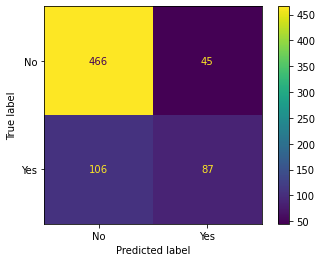

In [99]:
best_model_metrics(final_svc, X_train, X_test, y_train, y_test)

### Final Model

The Gradient Boosted Tree Classifier performed the best in terms of precision, with all the other classifiers relative close though. However, the false negative prediction of churn customers (customers who churn but the model predicts otherwise) is the smallest. In my opinion, that and the right positive predictions (customers who churn and the model predicts it right) are the most important categories, because here the company can act and try to keep the customers via some bonuses etc. and not loose the them at whole, while less damage is done to give bonuses to customers who would not churn but are said so by the model.
The final model is:


`final_gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=40)`

A final investigation of it will be performed.

In [100]:
feat_import = final_gb_model.feature_importances_

In [101]:
feat_import

array([7.97372036e-03, 3.39825116e-01, 6.43539709e-02, 6.78903263e-02,
       9.85975953e-04, 0.00000000e+00, 1.33242640e-03, 3.16590404e-03,
       5.99072319e-03, 6.24634553e-03, 2.42526590e-01, 1.10563534e-02,
       1.01405559e-02, 2.15307723e-02, 6.14657054e-04, 3.07220652e-03,
       9.61545238e-04, 0.00000000e+00, 3.08100198e-03, 1.61805391e-02,
       0.00000000e+00, 4.23986942e-03, 3.68403939e-03, 1.00436751e-02,
       4.45618303e-02, 4.21623764e-02, 1.58381225e-02, 1.04378087e-03,
       7.11746744e-02, 3.22901709e-04])

In [102]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats.head(3)

,Importance
SeniorCitizen,0.007974
tenure,0.339825
MonthlyCharges,0.064354


In [103]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
tenure,0.339825
InternetService_Fiber optic,0.242527
PaymentMethod_Electronic check,0.071175
TotalCharges,0.067890
MonthlyCharges,0.064354
Contract_One year,0.044562
Contract_Two year,0.042162
OnlineSecurity_Yes,0.021531
TechSupport_Yes,0.016181
PaperlessBilling_Yes,0.015838


In [104]:
imp_feats.describe().T

,count,mean,std,min,25%,50%,75%,max
Importance,30.0,0.033333,0.07429,0.0,0.001116,0.006119,0.020193,0.339825


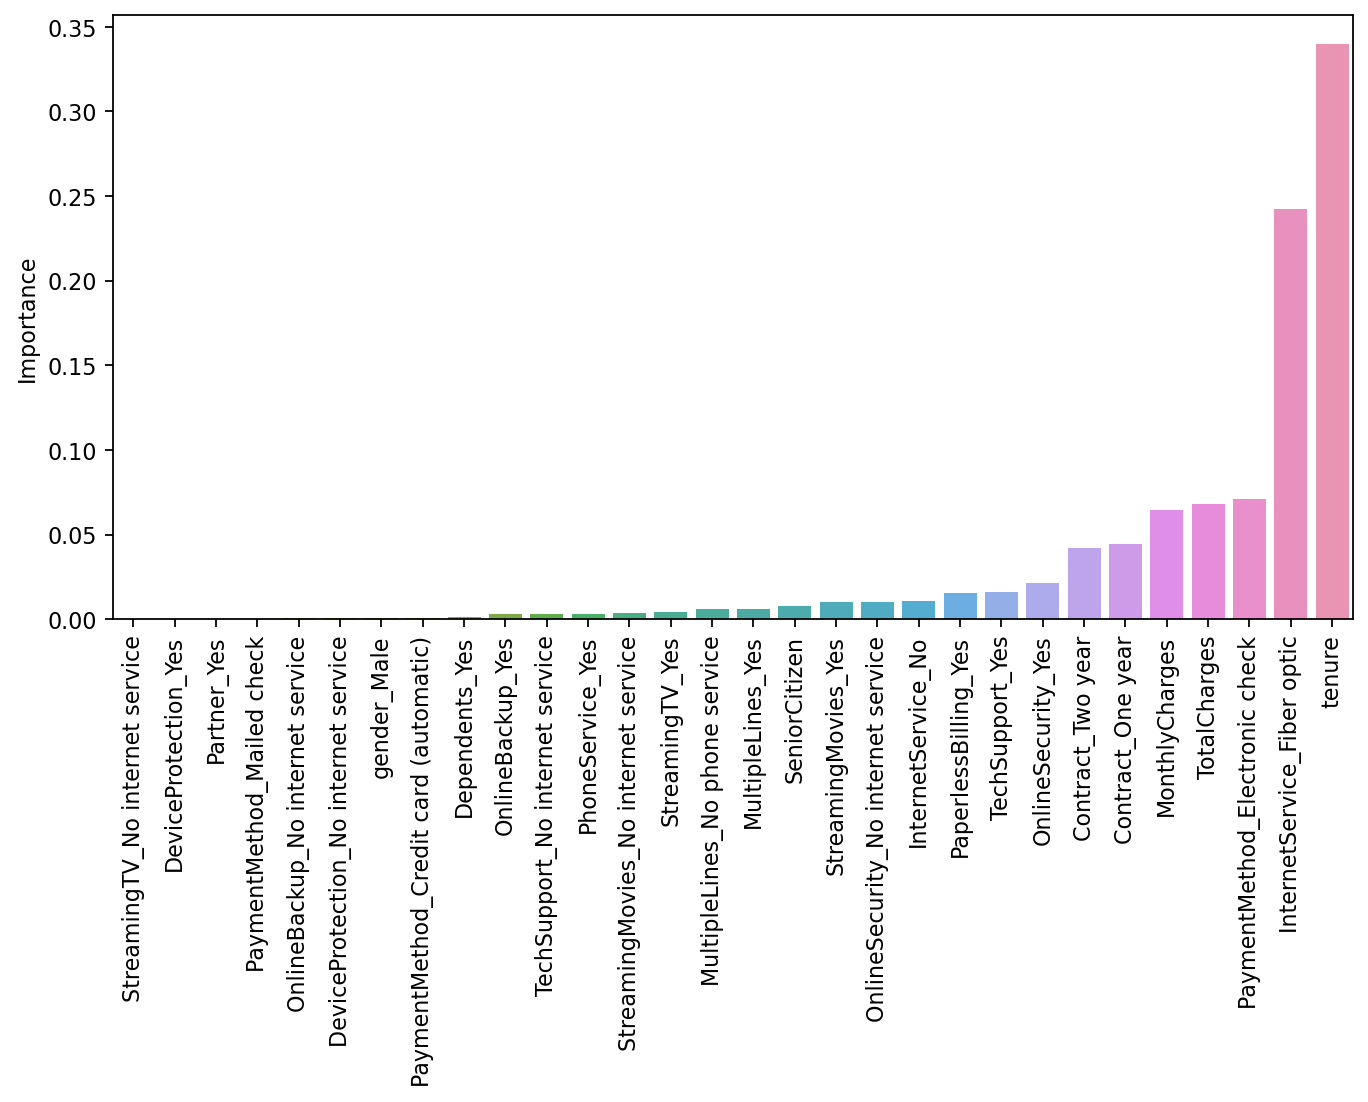

In [105]:
plt.figure(figsize=(10,5),dpi=160)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

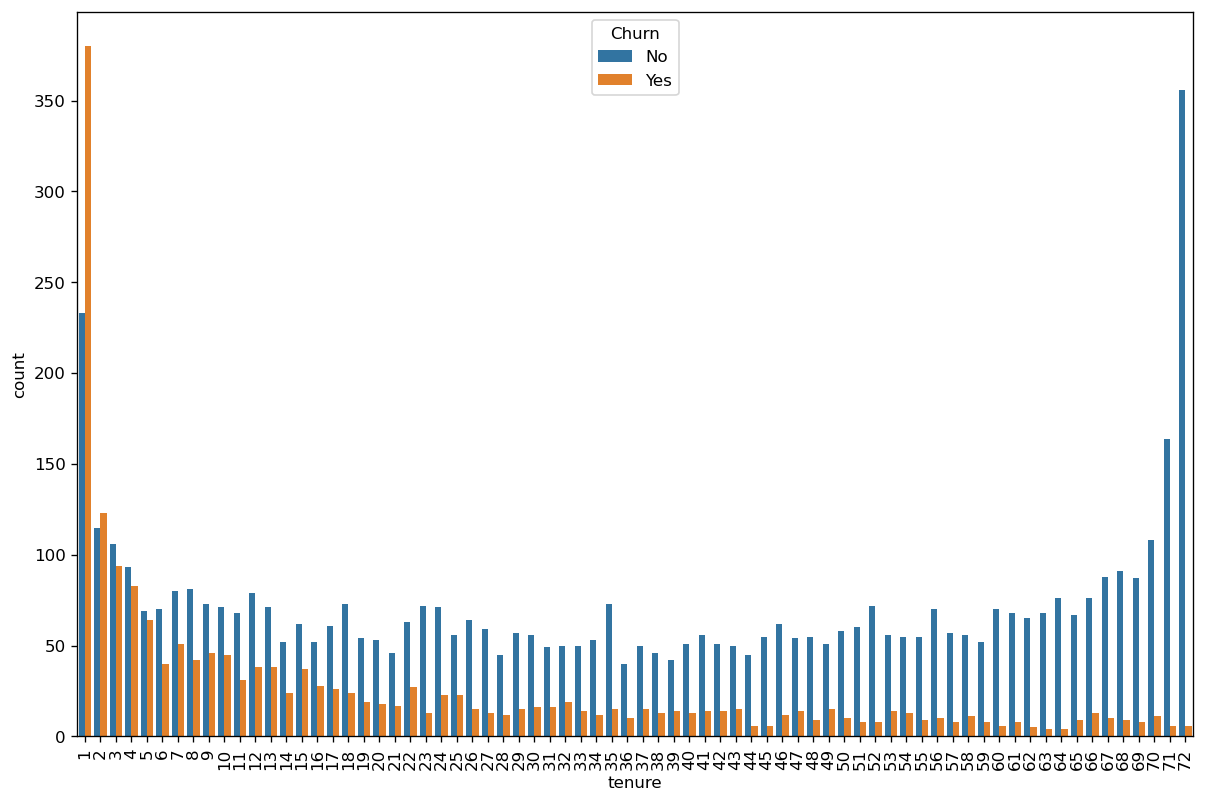

In [106]:
plt.figure(figsize=(12,8),dpi=120)
sns.countplot(data=df, x='tenure', hue='Churn')
plt.xticks(rotation=90);